In [4]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
import torch
import torch.nn as nn
from deeplkt.datasets.dataset import *
from torch.utils.data import DataLoader
from deeplkt.models.pure_lkt import PureLKTNet
from deeplkt.models.lkt_alexsobel import LKTAlexSobelNet

from deeplkt.models.lkt_vggsobel import LKTVGGSobelNet
from deeplkt.models.lkt_vggimproved import LKTVGGImproved
from deeplkt.models.base_model import BaseModel

from deeplkt.utils.util import dotdict
from deeplkt.utils.visualise import plot_different_results
from deeplkt.tracker.lkt_tracker import LKTTracker
from deeplkt.config import *

ModuleNotFoundError: No module named 'deeplkt'

In [3]:

use_cuda = torch.cuda.is_available()
print(use_cuda)
device = torch.device("cuda") if use_cuda else torch.device("cpu")



True


In [4]:
#!/usr/bin/env python
# coding: utf-8


# from pytorch_practise import *


vot_root_dir = '../../data/VOT/'
alov_root_dir = '../../data/ALOV/'


vot = VotDataset(os.path.join(vot_root_dir,
                       'VOT_images/'),
                 os.path.join(vot_root_dir,
                       'VOT_ann/'),
                 os.path.join(vot_root_dir,
                       'VOT_results/'), 
                 device)

alov = AlovDataset(os.path.join(alov_root_dir,
                       'ALOV_images/'),
                   os.path.join(alov_root_dir,
                       'ALOV_ann/'),
                   os.path.join(alov_root_dir,
                       'ALOV_results/'), 
                       device)


# train_loader = DataLoader(alov, batch_size=1, shuffle=False)



Parsing VOT dataset...
VOT dataset parsing done.
Total number of annotations in VOT dataset = 10651
Total number of videos in VOT dataset = 26
Parsing ALOV dataset...
ALOV dataset parsing done.
Total number of videos in ALOV dataset = 307
Total number of annotations in ALOV dataset = 15877


In [7]:
import cv2
img = vot.show_image_with_gt(0,1)
cv2.imwrite("vot_0_1.jpeg", img)

True

In [25]:
from deeplkt.config import *
params = dotdict({
    'mode' : MODE,
    'max_iterations' : MAX_LK_ITERATIONS,
    'epsilon' : EPSILON,
    'info': "VGGSobel LKT"
})
# lr = 0.0005
# momentum = 0.5


net = LKTVGGImproved(device, params)
tracker = LKTTracker(net)
train_params = dotdict({
    'batch_size' : BATCH_SIZE,
    'val_split' : VALIDATION_SPLIT,
    'train_examples':TRAIN_EXAMPLES,
    'shuffle_train': SHUFFLE_TRAIN,
    'random_seed': RANDOM_SEED,
    'lr': LR,
    'momentum': MOMENTUM,
    'l2': L2

})

model = BaseModel(tracker, 'checkpoint', 'logs', train_params)



In [7]:
for p in net.parameters():
    if(p.requires_grad):
        print(p.shape)


torch.Size([1, 3000, 1, 3, 3])
torch.Size([1, 3000, 1, 3, 3])


In [8]:
# print(net)
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)
count_parameters(net)


54000

Evaluating dataset for video  0
Total time taken =  20.711622714996338
Mean IOU =  0.0917397976098493
Evaluating dataset for video  1
Total time taken =  29.057586669921875
Mean IOU =  0.043476950493145566
Evaluating dataset for video  2
Total time taken =  9.513611316680908
Mean IOU =  0.06433518155398742
Evaluating dataset for video  3
Total time taken =  14.860378742218018
Mean IOU =  0.04086067819171349
Evaluating dataset for video  4
Total time taken =  8.940289974212646
Mean IOU =  0.02552463591844123
Evaluating dataset for video  5
Total time taken =  26.504542350769043
Mean IOU =  0.049687885234364806
Evaluating dataset for video  6
Total time taken =  7.480782985687256
Mean IOU =  0.1596524022779835
Evaluating dataset for video  7
Total time taken =  42.53661298751831
Mean IOU =  0.007386079568351941
Evaluating dataset for video  8
Total time taken =  11.171168804168701
Mean IOU =  0.0986565850615923
Evaluating dataset for video  9
Total time taken =  15.75252079963684
Mean IO

In [27]:
pure_lkt = []
for i in range(25):
    pure_lkt.append(model.eval_model(vot, i))

model.load_checkpoint(44, best=True)
learned_lkt = []
for i in range(25):
    learned_lkt.append(model.eval_model(vot, i))

results = {}
results['pure-lkt'] = pure_lkt
results['learned-lkt'] = learned_lkt

plot_different_results(results, 'results.png')

checkpoint/VGGSobel LKT/31-checkpoint.pth
Evaluating dataset for video  0
Total time taken =  22.944764375686646
Mean IOU =  0.0917398144498063
Evaluating dataset for video  1
Total time taken =  30.64492893218994
Mean IOU =  0.043476965358566946
Evaluating dataset for video  2
Total time taken =  10.595344066619873
Mean IOU =  0.06433518213353638
Evaluating dataset for video  3
Total time taken =  16.084619283676147
Mean IOU =  0.040860679362994555
Evaluating dataset for video  4
Total time taken =  10.063441276550293
Mean IOU =  0.025524633301674385
Evaluating dataset for video  5
Total time taken =  36.18597888946533
Mean IOU =  0.049687887899847315
Evaluating dataset for video  6
Total time taken =  11.519679307937622
Mean IOU =  0.15965241632191474
Evaluating dataset for video  7
Total time taken =  48.49022459983826
Mean IOU =  0.007386079569714968
Evaluating dataset for video  8
Total time taken =  12.312302112579346
Mean IOU =  0.09865659275217928
Evaluating dataset for video  

In [21]:
pure_lkt

[0.12341934347653223, 0.0369029711142952]

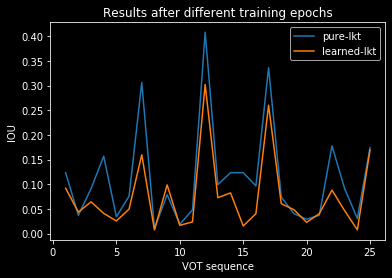

In [29]:

plot_different_results(results, 'results.png')